In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from json import loads 

In [36]:
velib = pd.read_csv(r"C:\Users\mathi\Desktop\Projet info\donnees\velib_clean.csv")

In [37]:
velib.head()

,station_id,10/19/20;18:01:51,10/19/20;18:06:52,10/19/20;18:11:52,10/19/20;18:16:52,10/19/20;18:21:52,10/19/20;18:26:53,10/19/20;18:31:53,10/19/20;18:36:53,10/19/20;18:41:54,...,11/03/20;16:01:46,11/03/20;16:06:47,11/03/20;16:11:47,11/03/20;16:16:47,11/03/20;16:21:48,11/03/20;16:26:48,11/03/20;16:31:48,11/03/20;16:36:49,11/03/20;16:41:49,11/03/20;16:46:49
0,213688169,"{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}",...,"{'mechanical': 4, 'ebike': 6}","{'mechanical': 4, 'ebike': 6}","{'mechanical': 3, 'ebike': 6}","{'mechanical': 4, 'ebike': 7}","{'mechanical': 5, 'ebike': 7}","{'mechanical': 5, 'ebike': 7}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 7}"
1,99950133,"{'mechanical': 41, 'ebike': 5}","{'mechanical': 41, 'ebike': 5}","{'mechanical': 42, 'ebike': 5}","{'mechanical': 42, 'ebike': 7}","{'mechanical': 41, 'ebike': 5}","{'mechanical': 40, 'ebike': 4}","{'mechanical': 38, 'ebike': 5}","{'mechanical': 39, 'ebike': 4}","{'mechanical': 40, 'ebike': 5}",...,"{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}"
2,516709288,"{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}",...,"{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 3}"
3,36255,"{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 0, 'ebike': 4}","{'mechanical': 1, 'ebike': 3}",...,"{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 2}"
4,37815204,"{'mechanical': 4, 'ebike': 1}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 3, 'ebike': 2}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}",...,"{'mechanical': 6, 'ebike': 0}","{'mechanical': 7, 'ebike': 0}","{'mechanical': 7, 'ebike': 0}","{'mechanical': 7, 'ebike': 1}","{'mechanical': 7, 'ebike': 1}","{'mechanical': 8, 'ebike': 1}","{'mechanical': 9, 'ebike': 0}","{'mechanical': 10, 'ebike': 0}","{'mechanical': 9, 'ebike': 0}","{'mechanical': 9, 'ebike': 0}"


In [38]:
def to_dictionary(jour):
    """transformer le format chelou en dico"""

    try :
        dictionary = eval(jour)
    except:
        dictionary = {'mechanical': 0, 'ebike': 0}
    
    return dictionary

In [39]:
col_vide='[{}, {}]'
colonnes_vides=[]
for j in velib.columns:
    if velib[j][0]==col_vide:
        print(j)
        colonnes_vides.append(j)

velib=velib.drop(colonnes_vides,axis=1)

In [40]:
longueur_du_dataframe = len(velib.iloc[1])

for i,j in enumerate(velib.columns[1:]):

    if i % 200 == 0:
        print(int(100 * i / longueur_du_dataframe))

    velib[j] = [to_dictionary(i) for i in velib[j]]

0
4
9
13
18
23
27
32
37
41
46
51
55
60
65
69
74
79
83
88
93
97


In [41]:
X = [ pd.to_datetime(date, format = r"%m/%d/%y;%H:%M:%S") for date in velib.columns[1:]]
Y_m = [dictionary["mechanical"] for dictionary in velib.iloc[1][1:]]
Y_e = [dictionary["ebike"] for dictionary in velib.iloc[1][1:]]

In [42]:
import matplotlib.pyplot as plt

In [43]:
print(len(X),len(Y_m))
X_i = x = np.linspace(0, 10, len(Y_m))

4294 4294


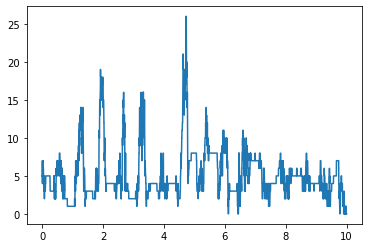

In [44]:
plt.plot(X_i,Y_e)
plt.show()

In [45]:
print(X[1],X[-1])

2020-10-19 18:06:52 2020-11-03 16:46:49


In [46]:
def mean_by_days(X, Y):
    x = []
    y = []


    if not len(X) == len(Y):
        return False


    old_day = [X[0].day, X[0].month, X[0].year]
    mean = 0
    iteration = 0

    for i in range(len(X)):
        day = [X[i].day, X[i].month, X[i].year]

        if  day == old_day:
            mean += Y[i]
            iteration += 1

        else :

            try:
                y.append(mean / iteration)
            except:
                y.append(0)

            x.append(str(old_day[0]) + "/" + str(old_day[1]))
            
            old_day = day
            mean = 0
            iteration = 0

    return x, y


In [47]:
x, y_e = mean_by_days(X, Y_e)
x, y_m = mean_by_days(X, Y_m)

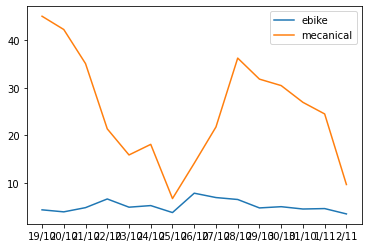

In [48]:
plt.plot(x, y_e, label = "ebike")
plt.plot(x, y_m, label = "mecanical")
plt.legend()
plt.show()

In [49]:
def average_day_by_hours (X, Y):
    x = []
    y = []
    
    if not len(X) == len(Y):
        return False

    hours = {}

    for i in range(24):
        hours[i] = []

    for i in range(len(X)):
        hours[X[i].hour].append(Y[i])

    for i in range(24):
        y.append(
            sum(hours[i]) / len(hours[i])
        )
        x.append(i)

    return x, y

In [50]:
hours, mean_hour_e = average_day_by_hours(X, Y_e)
hours, mean_hour_m = average_day_by_hours(X, Y_m)

[]

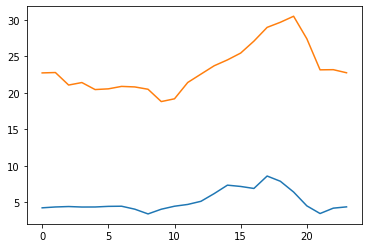

In [51]:
plt.plot(hours, mean_hour_e)
plt.plot(hours, mean_hour_m)
plt.plot()

In [52]:
import statistics 

In [53]:
def week_days_and_weekend_days(X, Y):
    x = []
    y_weekend = []
    y_week = []

    if not len(X) == len(Y):
        return False

    hours = {"weekend": {}, "weekday": {}}

    for i in range(24):
        hours["weekend"][i] = []
        hours["weekday"][i] = []

    for i in range(len(X)):

        if X[i].weekday() < 5:
            hours["weekday"][X[i].hour].append(Y[i])
        if not X[i].weekday() < 5:
            hours["weekend"][X[i].hour].append(Y[i])


    for i in range(24):
        y_week.append(
np.array(hours["weekday"][i])
        )
        y_weekend.append(
np.array(hours["weekend"][i])
        )
        x.append(i)


    return x, y_week, y_weekend

In [54]:
x, y_week, y_weekend = week_days_and_weekend_days(X, Y_m)
y_week_mean, y_week_q1, y_week_q3 = [], [], []
y_weekend_mean, y_weekend_q1, y_weekend_q3 = [], [], []


for i in range(len(y_week)):
    y_week_mean.append(np.mean(y_week[i]))
    y_week_q1.append(np.percentile(y_week[i], 25))
    y_week_q3.append(np.percentile(y_week[i], 75))

for i in range(len(y_weekend)):
    y_weekend_mean.append(np.mean(y_weekend[i]))
    y_weekend_q1.append(np.percentile(y_weekend[i], 25))
    y_weekend_q3.append(np.percentile(y_weekend[i], 75))


In [55]:
y_week[0]

array([47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4])

[]

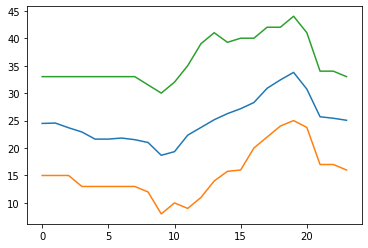

In [56]:
plt.plot(x, y_week_mean)
plt.plot(x, y_week_q1)
plt.plot(x, y_week_q3)
plt.plot()

[]

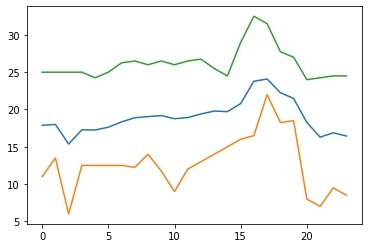

In [57]:
plt.plot(x, y_weekend_mean)
plt.plot(x, y_weekend_q1)
plt.plot(x, y_weekend_q3)
plt.plot()

# K_means with tslean

### with the capacity in percentage every hour

In [58]:
import urllib.request
import json
from pandas.io.json import json_normalize

In [59]:
request= urllib.request.Request('https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/station_information.json')
response = urllib.request.urlopen(request)
station_info = response.read()
data = json.loads(station_info)
df_station_info = json_normalize(data['data']['stations'])
df_station_info.head()

,station_id,name,lat,lon,capacity,stationCode,rental_methods
0,213688169,Benjamin Godard - Victor Hugo,48.865983,2.275725,35,16107,NaN
1,99950133,André Mazet - Saint-André des Arts,48.853756,2.339096,55,6015,[CREDITCARD]
2,516709288,Charonne - Robert et Sonia Delauney,48.855908,2.392571,20,11104,NaN
3,36255,Toudouze - Clauzel,48.879296,2.337360,21,9020,[CREDITCARD]
4,37815204,Mairie du 12ème,48.840855,2.387555,30,12109,NaN


In [60]:
df_id_name_capacity = df_station_info[["station_id", "lat", "lon", "name", "capacity"]]

In [61]:
velib_w_capacity = df_id_name_capacity.merge(velib, how = "inner", left_on = "station_id", right_on = "station_id")
velib_w_capacity = velib_w_capacity[velib_w_capacity["capacity"] != 0]

In [62]:
velib_w_capacity.head()

,station_id,lat,lon,name,capacity,10/19/20;18:01:51,10/19/20;18:06:52,10/19/20;18:11:52,10/19/20;18:16:52,10/19/20;18:21:52,...,11/03/20;16:01:46,11/03/20;16:06:47,11/03/20;16:11:47,11/03/20;16:16:47,11/03/20;16:21:48,11/03/20;16:26:48,11/03/20;16:31:48,11/03/20;16:36:49,11/03/20;16:41:49,11/03/20;16:46:49
0,213688169,48.865983,2.275725,Benjamin Godard - Victor Hugo,35,"{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}",...,"{'mechanical': 4, 'ebike': 6}","{'mechanical': 4, 'ebike': 6}","{'mechanical': 3, 'ebike': 6}","{'mechanical': 4, 'ebike': 7}","{'mechanical': 5, 'ebike': 7}","{'mechanical': 5, 'ebike': 7}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 8}","{'mechanical': 5, 'ebike': 7}"
1,99950133,48.853756,2.339096,André Mazet - Saint-André des Arts,55,"{'mechanical': 41, 'ebike': 5}","{'mechanical': 41, 'ebike': 5}","{'mechanical': 42, 'ebike': 5}","{'mechanical': 42, 'ebike': 7}","{'mechanical': 41, 'ebike': 5}",...,"{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}","{'mechanical': 2, 'ebike': 0}"
2,516709288,48.855908,2.392571,Charonne - Robert et Sonia Delauney,20,"{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 0, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}",...,"{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 2}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 3}","{'mechanical': 1, 'ebike': 3}"
3,36255,48.879296,2.337360,Toudouze - Clauzel,21,"{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 0}","{'mechanical': 0, 'ebike': 2}",...,"{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 2}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 3}","{'mechanical': 0, 'ebike': 2}"
4,37815204,48.840855,2.387555,Mairie du 12ème,30,"{'mechanical': 4, 'ebike': 1}","{'mechanical': 3, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 1, 'ebike': 1}","{'mechanical': 2, 'ebike': 1}",...,"{'mechanical': 6, 'ebike': 0}","{'mechanical': 7, 'ebike': 0}","{'mechanical': 7, 'ebike': 0}","{'mechanical': 7, 'ebike': 1}","{'mechanical': 7, 'ebike': 1}","{'mechanical': 8, 'ebike': 1}","{'mechanical': 9, 'ebike': 0}","{'mechanical': 10, 'ebike': 0}","{'mechanical': 9, 'ebike': 0}","{'mechanical': 9, 'ebike': 0}"


In [63]:
Y = []
X = [ pd.to_datetime(date, format = r"%m/%d/%y;%H:%M:%S") for date in velib_w_capacity.columns[5:]]


for i in range(velib_w_capacity.shape[0]):


    if i % 200 == 0:
        print(int(100 * i / longueur_du_dataframe))

    y_week_mean = []
    y_weekend_mean = []
    y = [dictionary["mechanical"] + dictionary["ebike"] for dictionary in velib_w_capacity.iloc[i][5:]]

    x, y_week, y_weekend = week_days_and_weekend_days(X, y)

    

    for j in range(len(y_week)):     
        y_week_mean.append(np.mean(y_week[j]) / velib_w_capacity.iloc[i]["capacity"])
        y_weekend_mean.append(np.mean(y_weekend[j]) / velib_w_capacity.iloc[i]["capacity"])

    Y.append(np.transpose(np.array([y_week_mean, y_weekend_mean])))

Y = np.array(Y)

0
4
9
13
18
23
27


In [64]:
from tslearn.clustering import TimeSeriesKMeans


model = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=10)
Fit = model.fit(Y)

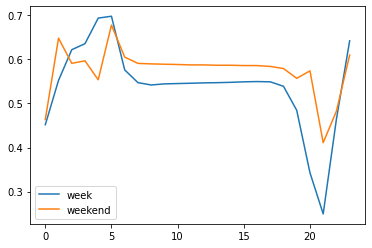

In [65]:
x = [i for i in range(24)]
cluster_1_week = [times[0] for times in Fit.cluster_centers_ [0]]
cluster_1_weekend = [times[1] for times in Fit.cluster_centers_ [0]]
plt.plot(x, cluster_1_week, label = "week")
plt.plot(x,cluster_1_weekend, label = "weekend")
plt.legend()
plt.show()

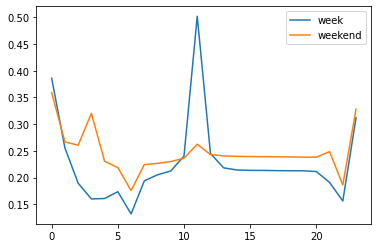

In [66]:
cluster_2_week = [times[0] for times in Fit.cluster_centers_ [1]]
cluster_2_weekend = [times[1] for times in Fit.cluster_centers_ [1]]
plt.plot(x, cluster_2_week, label = "week")
plt.plot(x,cluster_2_weekend, label = "weekend")
plt.legend()
plt.show()

# Kmean with a normalized and mean centered data

In [67]:
Y = []
X = [ pd.to_datetime(date, format = r"%m/%d/%y;%H:%M:%S") for date in velib_w_capacity.columns[5:]]
list_velib_wo_bike = []

for i in range(velib_w_capacity.shape[0]):


    if i % 200 == 0:
        print(int(100 * i / velib_w_capacity.shape[0]))

    y_week_mean = []
    y_weekend_mean = []
    y = [dictionary["mechanical"] + dictionary["ebike"] for dictionary in velib_w_capacity.iloc[i][5:]]

    x, y_week, y_weekend = week_days_and_weekend_days(X, y)

    

    for j in range(len(y_week)):     
        y_week_mean.append(np.mean(y_week[j]))
        y_weekend_mean.append(np.mean(y_weekend[j]))

    # normalizing and mean centering
    y_week_mean -= np.mean(y_week_mean)
    y_weekend_mean -= np.mean(y_weekend_mean)

    if np.max(np.abs(y_week_mean)) == 0:
        list_velib_wo_bike.append(i)

    else:
        Y.append(np.transpose(np.array([
            y_week_mean / np.max(np.abs(y_week_mean)),
            y_weekend_mean / np.max(np.abs(y_weekend_mean))
        ])))

Y = np.array(Y)

0
14
28
43
57
72
86


In [68]:
list_velib_wo_bike

[145,
 188,
 244,
 309,
 479,
 572,
 833,
 912,
 952,
 1034,
 1163,
 1207,
 1228,
 1256,
 1284,
 1336]

## cluster en folie

In [103]:
nb_clusters= [1,8]

In [88]:
from tslearn.clustering import TimeSeriesKMeans

clusters_Kmeans = {}
for i in range(*nb_clusters):
    clusters_Kmeans[i] = []
    clusters_Kmeans[i].append(TimeSeriesKMeans(n_clusters= i, metric="dtw", max_iter=20, n_init= 10))
    clusters_Kmeans[i].append(clusters_Kmeans[i][0].fit_predict(Y))


In [100]:
i = 1

clusters_Kmeans[i] = []
clusters_Kmeans[i].append(TimeSeriesKMeans(n_clusters= i, metric="dtw", max_iter=20, n_init= 10))
clusters_Kmeans[i].append(clusters_Kmeans[i][0].fit_predict(Y))

In [101]:
list_inertia.append(clusters_Kmeans[i][0].inertia_)

### création médianes

In [89]:
for i in range(*nb_clusters):

    clusters_Kmeans[i].append({})
    for j in range(i):
            clusters_Kmeans[i][2][j] = []

    for index in range(len(clusters_Kmeans[i][1])):
        num_cluster = clusters_Kmeans[i][1][index]    
        clusters_Kmeans[i][2][num_cluster].append(Y[index])

    for j in range(i):
        q1_week = []
        q1_weekend = []
        q3_week = []
        q3_weekend = []
        for hour in range(24):
            q1_week.append(np.percentile([vect[hour][0] for vect in clusters_Kmeans[i][2][j]], 25))
            q1_weekend.append(np.percentile([vect[hour][1] for vect in clusters_Kmeans[i][2][j]], 25))
            q3_week.append(np.percentile([vect[hour][0] for vect in clusters_Kmeans[i][2][j]], 75))
            q3_weekend.append(np.percentile([vect[hour][1] for vect in clusters_Kmeans[i][2][j]], 75))
        clusters_Kmeans[i].append([q1_week,
        q1_weekend,
        q3_week,
        q3_weekend])


In [ ]:
for j in range(*nb_clusters):
    clusters = {}
    for i in range(len(clusters_Kmeans[j][0].cluster_centers_)):
        clusters[i] = [
            [times[0] for times in clusters_Kmeans[j][0].cluster_centers_ [i]],
            [times[1] for times in clusters_Kmeans[j][0].cluster_centers_ [i]]
        ]

    fig, axs = plt.subplots(len(clusters_Kmeans[j][0].cluster_centers_), 1, figsize=(10, 5 * j) )
    x = [i for i in range(24)]


    for i in range(len(clusters_Kmeans[j][0].cluster_centers_)):  
        axs[i].plot(x, clusters[i][0], label = "week")
        axs[i].plot(x, clusters[i][1], label = "weekend")

        axs[i].legend()
        axs[i].set_title("cluster " + str(i))
        axs[i].set_ylabel("taux d'occupation")
        axs[i].set_xlabel("heure")

    fig.savefig("results/Kmeans " + str(j) + " clusters" ".jpg")

In [104]:
list_inertia = []
for j in range(*nb_clusters):
    list_inertia.append(clusters_Kmeans[j][0].inertia_)

In [106]:
list_inertia

[7.608265947929566,
 5.393362054423828,
 4.503982596865056,
 4.123824789662627,
 3.867275663668193,
 3.681792106325219,
 3.491649914116708]

In [107]:
x = [1, 2, 3, 4, 5, 6, 7]

Text(0, 0.5, 'inertie')

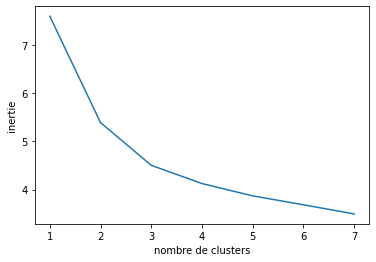

In [110]:
plt.plot(x, list_inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("inertie")